<a href="https://colab.research.google.com/github/olinyoder2534/Misc/blob/main/EnergyConsumptionTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploration

In [ ]:
df = pd.read_csv('/content/PJME_hourly.csv')

In [ ]:
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [ ]:
df.shape

(145366, 2)

## Preprocessing

In [ ]:
df = df.set_index('Datetime')

In [ ]:
df.index = pd.to_datetime(df.index)

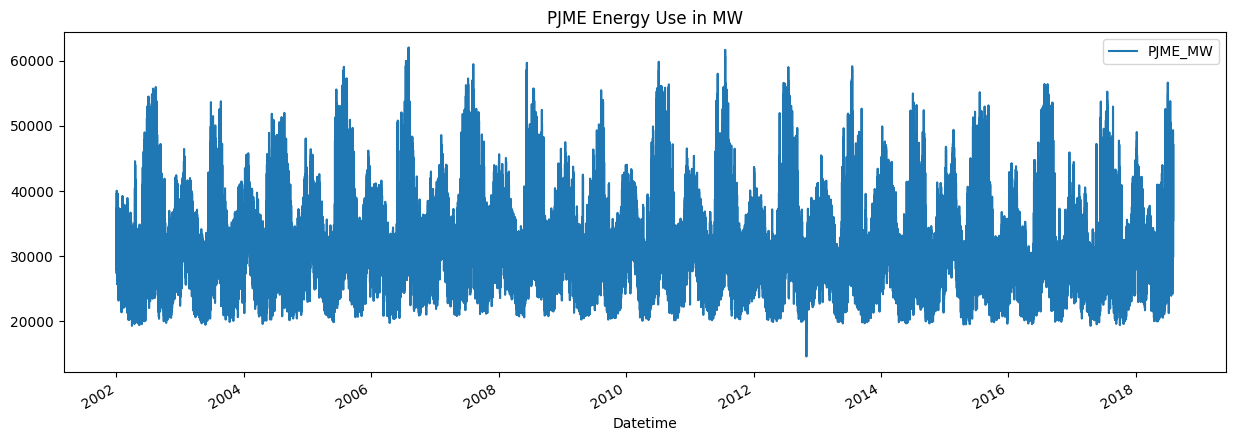

In [ ]:
df.plot(figsize=(15, 5),
        title='PJME Energy Use in MW')
plt.show()

In [ ]:
#train test split
#just splitting based on latest data, not using rolling cv

train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(df):
    train1 = df.iloc[train_index]
    test1 = df.iloc[test_index]
    #print("Train indices:", train_index)
    #print("Test indices:", test_index)
    print("Train set:")
    print(train1.head())
    print("Test set:")
    print(test1.head())

Train set:
                     PJME_MW
Datetime                    
2002-12-31 01:00:00  26498.0
2002-12-31 02:00:00  25147.0
2002-12-31 03:00:00  24574.0
2002-12-31 04:00:00  24393.0
2002-12-31 05:00:00  24860.0
Test set:
                     PJME_MW
Datetime                    
2004-03-27 22:00:00  27655.0
2004-03-27 23:00:00  25981.0
2004-03-28 00:00:00  24098.0
2004-03-26 01:00:00  24609.0
2004-03-26 02:00:00  23603.0
Train set:
                     PJME_MW
Datetime                    
2002-12-31 01:00:00  26498.0
2002-12-31 02:00:00  25147.0
2002-12-31 03:00:00  24574.0
2002-12-31 04:00:00  24393.0
2002-12-31 05:00:00  24860.0
Test set:
                     PJME_MW
Datetime                    
2007-06-21 14:00:00  40678.0
2007-06-21 15:00:00  41680.0
2007-06-21 16:00:00  42619.0
2007-06-21 17:00:00  43168.0
2007-06-21 18:00:00  42568.0
Train set:
                     PJME_MW
Datetime                    
2002-12-31 01:00:00  26498.0
2002-12-31 02:00:00  25147.0
2002-12-31 03:00:00

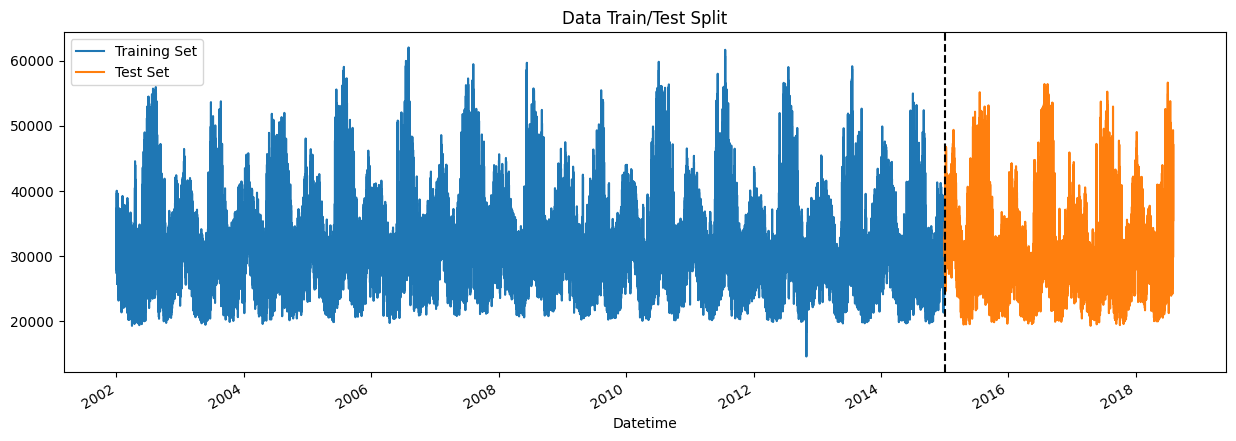

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

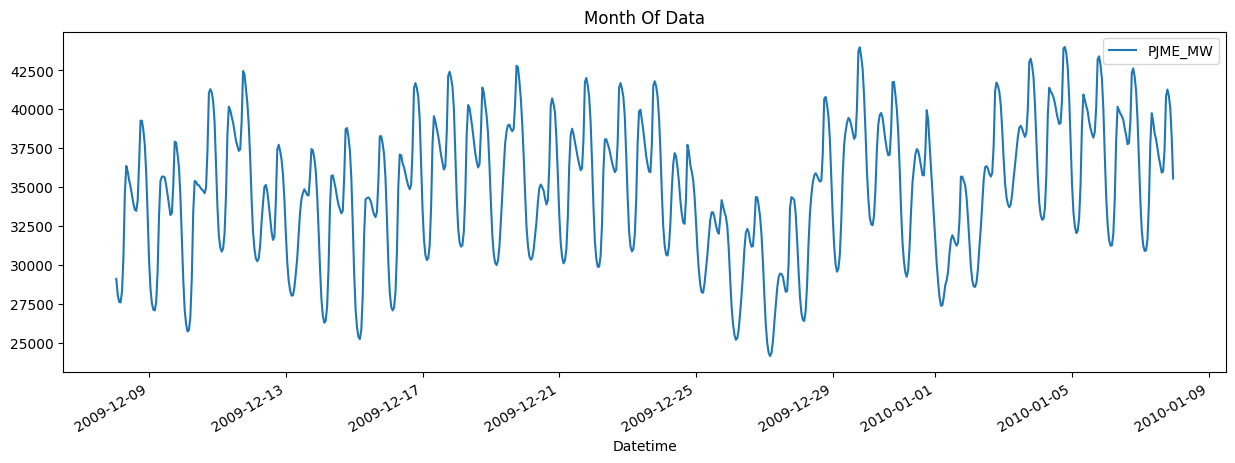

In [ ]:
df.loc[(df.index > '12-08-2009') & (df.index < '01-08-2010')] \
    .plot(figsize=(15, 5), title='Month Of Data')
plt.show()

In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

In [ ]:
create_features(df)

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365,31,1
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365,31,1
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365,31,1
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365,31,1
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365,31,1
...,...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,0,1,1,2018,1,1,1
2018-01-01 21:00:00,43751.0,21,0,1,1,2018,1,1,1
2018-01-01 22:00:00,42402.0,22,0,1,1,2018,1,1,1


In [ ]:
df.head()

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365,31,1
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365,31,1
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365,31,1
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365,31,1
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365,31,1


In [ ]:
train = create_features(train)
train.head()

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365,31,1
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365,31,1
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365,31,1
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365,31,1
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365,31,1


In [ ]:
test = create_features(test)
test.head()

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2015-01-01 00:00:00,32802.0,0,3,1,1,2015,1,1,1
2015-12-31 01:00:00,24305.0,1,3,4,12,2015,365,31,53
2015-12-31 02:00:00,23156.0,2,3,4,12,2015,365,31,53
2015-12-31 03:00:00,22514.0,3,3,4,12,2015,365,31,53
2015-12-31 04:00:00,22330.0,4,3,4,12,2015,365,31,53


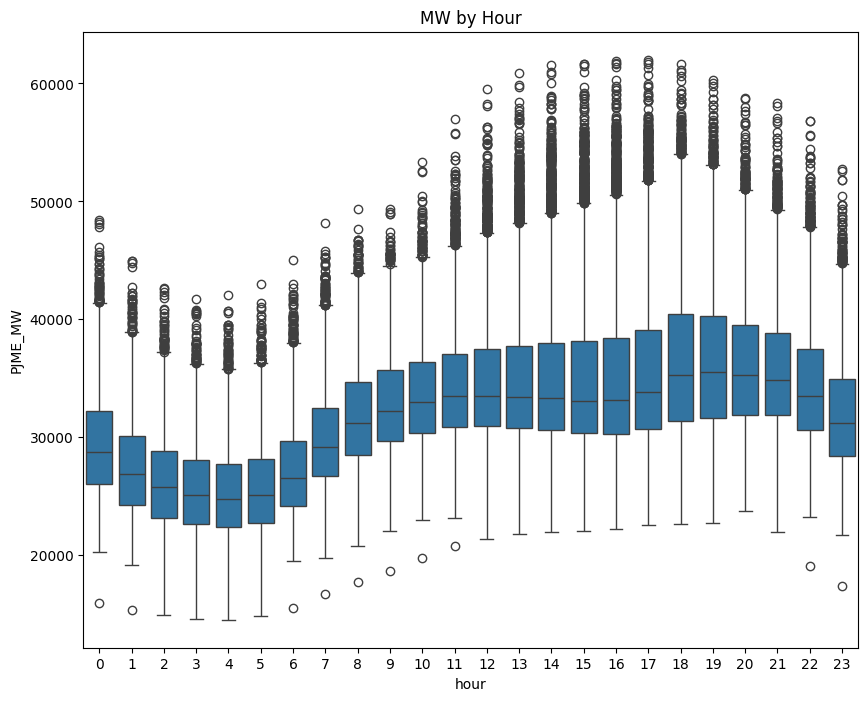

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='PJME_MW')
ax.set_title('MW by Hour')
plt.show()

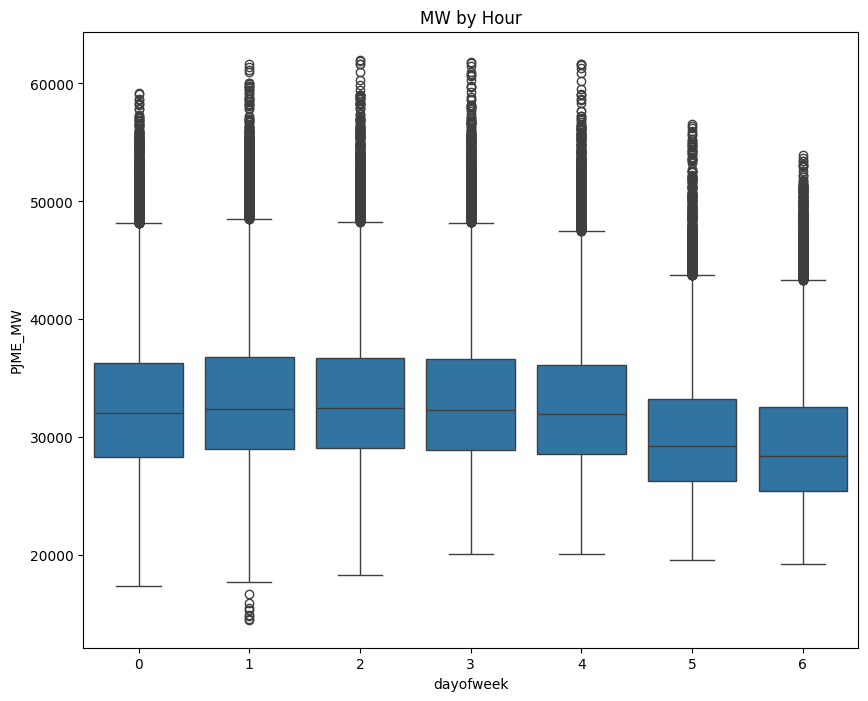

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='dayofweek', y='PJME_MW')
ax.set_title('MW by Hour')
plt.show()

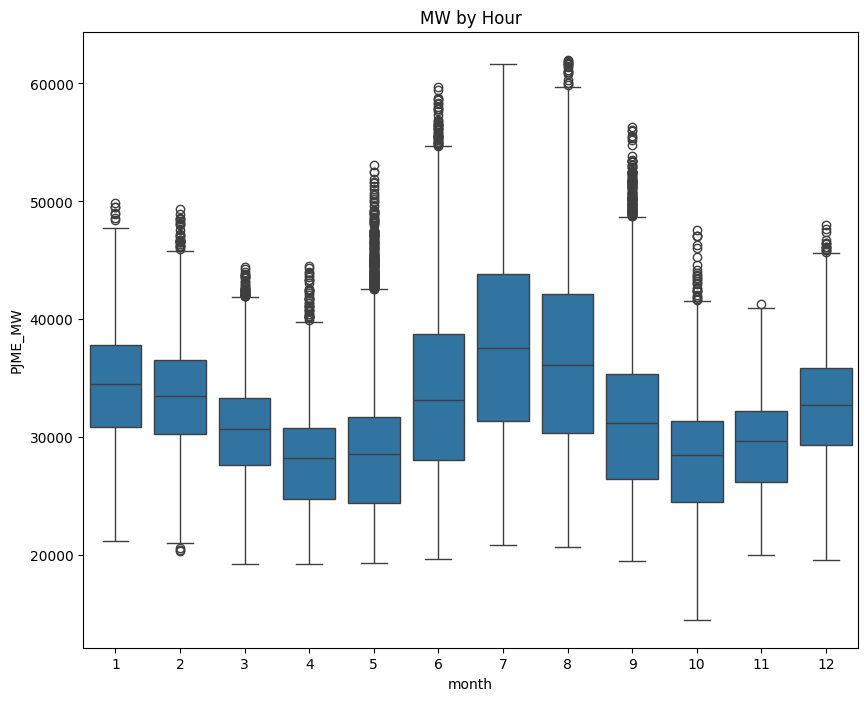

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='PJME_MW')
ax.set_title('MW by Hour')
plt.show()

## Modeling

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'PJME_MW'

missing_features = [feature for feature in FEATURES if feature not in train.columns]
if missing_features:
    print("Missing features in train DataFrame: {}".format(missing_features))
else:
    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

In [ ]:
train1 = create_features(train1)
test1 = create_features(test1)

missing_features = [feature for feature in FEATURES if feature not in train.columns]
if missing_features:
    print("Missing features in train DataFrame: {}".format(missing_features))
else:
    X_train1 = train1[FEATURES]
    y_train1 = train1[TARGET]

    X_test1 = test1[FEATURES]
    y_test1 = test1[TARGET]

In [ ]:
model1 = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)

In [ ]:
model1.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:32605.13970	validation_1-rmse:31657.15729


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:02:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:12584.35462	validation_1-rmse:11747.28803
[200]	validation_0-rmse:5837.33066	validation_1-rmse:5363.58554
[300]	validation_0-rmse:3923.28511	validation_1-rmse:4020.48045
[400]	validation_0-rmse:3447.54638	validation_1-rmse:3860.60088
[500]	validation_0-rmse:3288.19208	validation_1-rmse:3816.37862
[600]	validation_0-rmse:3206.55619	validation_1-rmse:3779.04119
[700]	validation_0-rmse:3153.61368	validation_1-rmse:3754.45684
[800]	validation_0-rmse:3114.34038	validation_1-rmse:3738.38209
[900]	validation_0-rmse:3084.39550	validation_1-rmse:3730.01893
[988]	validation_0-rmse:3060.25324	validation_1-rmse:3728.07396


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [ ]:
model2 = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)

In [ ]:
model2.fit(X_train1, y_train1,
        eval_set=[(X_train1, y_train1), (X_test1, y_test1)],
        verbose=100)

[0]	validation_0-rmse:32516.97991	validation_1-rmse:31828.01839


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:02:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:12551.34047	validation_1-rmse:11922.47762
[200]	validation_0-rmse:5830.49746	validation_1-rmse:5528.30500
[300]	validation_0-rmse:3930.46237	validation_1-rmse:4165.97101
[400]	validation_0-rmse:3456.83815	validation_1-rmse:3961.90658
[500]	validation_0-rmse:3296.20020	validation_1-rmse:3905.28144
[600]	validation_0-rmse:3217.64401	validation_1-rmse:3875.82498
[700]	validation_0-rmse:3164.48754	validation_1-rmse:3857.09968
[800]	validation_0-rmse:3122.47782	validation_1-rmse:3850.15269
[900]	validation_0-rmse:3093.41539	validation_1-rmse:3847.99542
[917]	validation_0-rmse:3088.83954	validation_1-rmse:3849.02815


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

## Evaluation

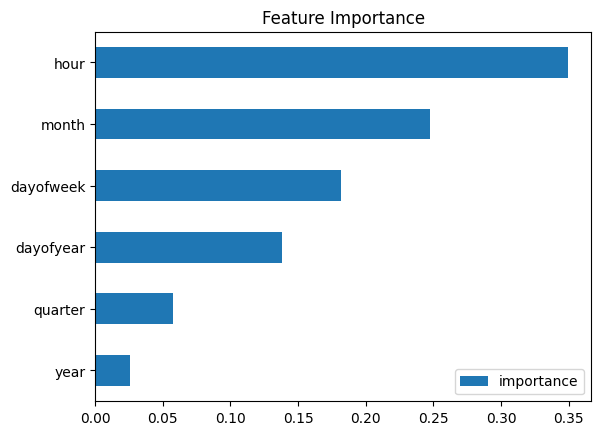

In [ ]:
fi = pd.DataFrame(data=model1.feature_importances_,
             index=model1.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

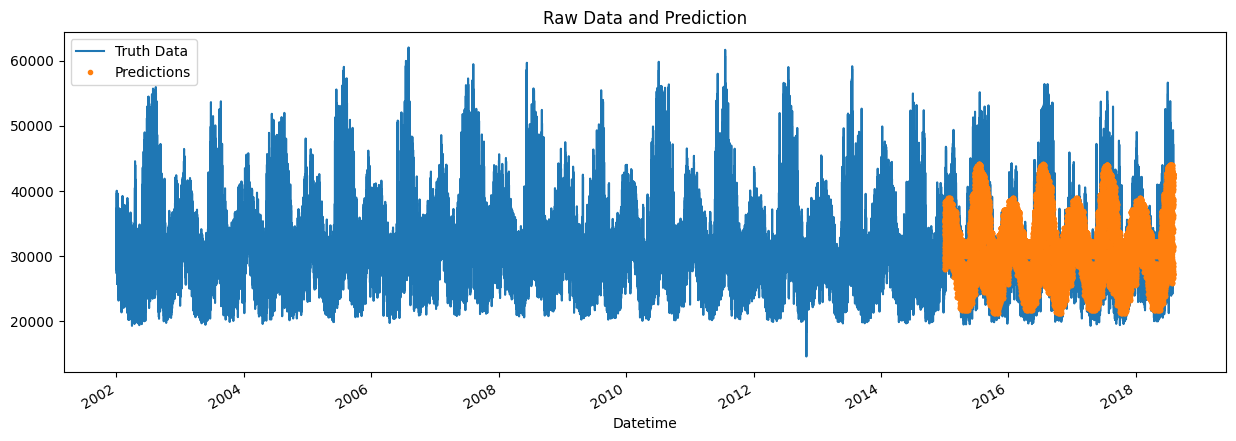

In [ ]:
test['prediction'] = model1.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['PJME_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

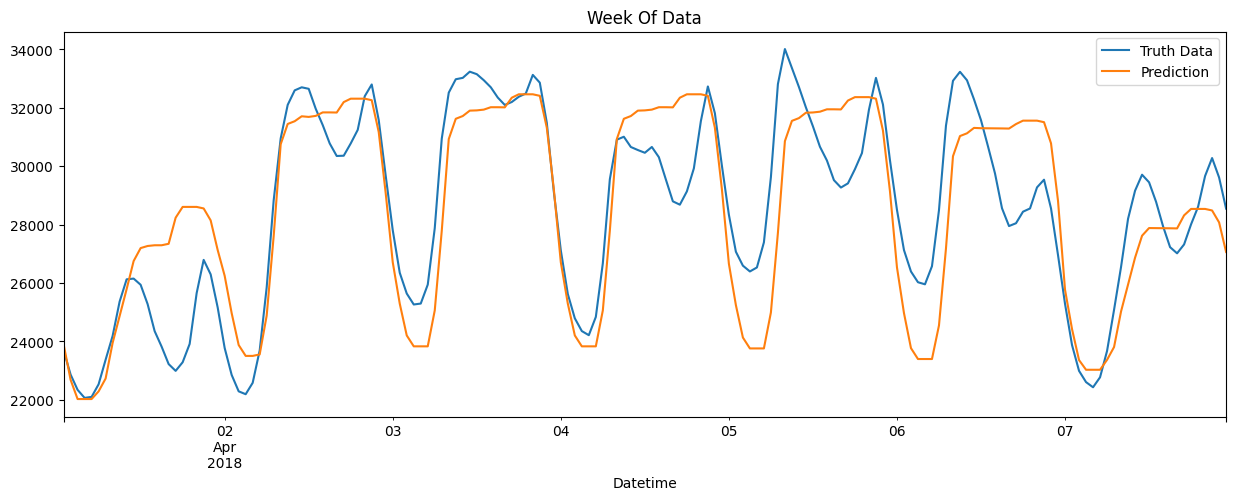

In [ ]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['PJME_MW'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction'] \
    .plot(style='')
plt.legend(['Truth Data','Prediction'])
plt.show()

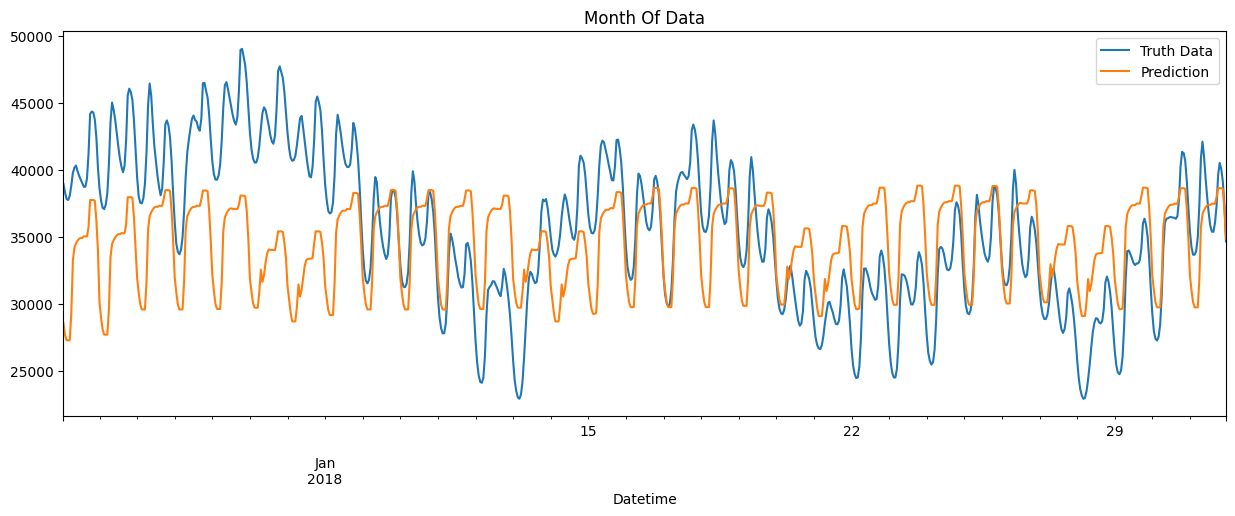

In [ ]:
ax = df.loc[(df.index > '01-01-2018') & (df.index < '02-01-2018')]['PJME_MW'] \
    .plot(figsize=(15, 5), title='Month Of Data')
df.loc[(df.index > '01-01-2018') & (df.index < '02-01-2018')]['prediction'] \
    .plot(style='')
plt.legend(['Truth Data','Prediction'])
plt.show()

In [ ]:
score = np.sqrt(mean_squared_error(test['PJME_MW'], test['prediction']))
print('RMSE Score on Test set: {}'.format(round(score, 3)))

RMSE Score on Test set: 3726.799


In [ ]:
test1['prediction'] = model2.predict(X_test1)
score1 = np.sqrt(mean_squared_error(test1['PJME_MW'], test1['prediction']))
print('RMSE Score on Test set using windowed cv: {}'.format(round(score1, 3)))

RMSE Score on Test set using windowed cv: 3847.218


In [ ]:
#worst predicted days

test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2016-08-13    12879.484619
2016-08-14    12772.887207
2015-02-20    11186.031494
2016-09-09    10966.513102
2016-09-10    10889.102214
2018-01-06    10642.975830
2016-08-12    10041.172689
2015-02-21     9988.168783
2015-02-16     9900.809326
2018-01-07     9852.571370
Name: error, dtype: float64

In [ ]:
test.groupby(['dayofweek'])['error'].mean().sort_values(ascending=False).head(10)

dayofweek
4    2977.932536
0    2962.332179
3    2933.921920
1    2867.536668
6    2867.499700
2    2865.019006
5    2841.627144
Name: error, dtype: float64

In [ ]:
#best predicted days

test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=True).head(10)

date
2017-10-24    322.958008
2015-10-28    426.451335
2016-10-27    543.167155
2015-05-06    556.749674
2017-10-15    569.468262
2018-05-16    569.951009
2015-11-06    678.310140
2017-04-07    687.475911
2016-12-29    706.143392
2016-09-16    711.019694
Name: error, dtype: float64

In [ ]:
test.groupby(['dayofweek'])['error'].mean().sort_values(ascending=True).head(10)

dayofweek
5    2841.627144
2    2865.019006
6    2867.499700
1    2867.536668
3    2933.921920
0    2962.332179
4    2977.932536
Name: error, dtype: float64